# Mental Health in Tech (2016): Exploratory Analysis using Data Visualization

## Questions to Consider
1. Is there a correlation between the company's support for helping those with mental health conditions and workers' willingness to reach out for help?
2. Do self-employed workers have more or less trouble with reaching out for help?
3. Are workers more likely to reach out for help if they work at a company that has fewer or more employees?
4. Are workers who do have a family history of mental health conditions more likely to reach out for help than those who don't?
5. Do a lot of companies provide help to people with mental health conditions?
6. Are smaller or larger companies more likely to provide people with mental health conditions?
7. Given a person's knowledge of his/her own mental health, what kind of company should he/she work at to be comfortable when asking for help?

In [1]:
import numpy as np
import pandas as pd
import random as rnd

import seaborn as sns
sns.set_palette('Set2')
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('mental-heath-in-tech-2016_20161114.csv')

# Previewing the Survey Data

- There are 63 questions and 1433 survey participants. 
- Some responses have a lot of null values, and I realized that this is because people who are self-employed did not answer the same set of questions as those who are not self-employed.

In [2]:
data.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [3]:
data.describe()

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
count,1433.000000,1146.000000,263.000000,287.000000,1433.000000,1433.000000,1433.000000
mean,0.200279,0.770506,0.942966,0.644599,0.882066,0.585485,34.286113
std,0.400349,0.420691,0.232350,0.479471,0.322643,0.492810,11.290931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,323.000000


In [4]:
data.describe(include=['O'])

,How many employees does your company or organization have?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,...,"If so, what condition(s) were you diagnosed with?","If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
count,1146,1146,1013,1146,1146,1146,1146,1146,1146,1146,...,711,1433,1433,1430,1433,840,1433,851,1433,1433
unique,6,4,3,3,3,3,6,3,3,3,...,116,5,5,70,53,47,53,48,264,3
top,26-100,Yes,No,No,No,I don't know,Somewhat easy,Maybe,No,Maybe,...,"Mood Disorder (Depression, Bipolar Disorder, etc)",Not applicable to me,Often,Male,United States of America,California,United States of America,California,Back-end Developer,Sometimes
freq,292,531,354,813,531,742,281,487,837,479,...,187,557,538,610,840,130,851,141,263,757


# Cleaning the Data
I noticed that some of the data does not make sense. For instance, the minimum age is 3 and the maximum age is 323. However, the average age is 34, which may imply that these may be typos. Thus, instead of dropping the rows with nonsensical ages, I changed them to 34 in hopes of making use of the other responses in the column.

In addition, there are 70 unique genders, which is due to the fact that participants were allowed to type their genders freely. I tried my best to group up the genders while respecting the participants' answers to the best of my ability.

I also decided to drop the columns that have custom responses because those are difficult to analyze without going through each response manually.

In [5]:
# clean the ages by replacing the weird ages with the mean age
data.loc[(data['What is your age?'] > 90), 'What is your age?'] = 34
data.loc[(data['What is your age?'] < 10), 'What is your age?'] = 34
data
# print('Age\tCount')
# data['What is your age?'].value_counts()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not applicable to me,Not applicable to me,34,Female,United States of America,New York,United States of America,New York,Other,Sometimes
1429,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Often,56,MALE,United States of America,California,Afghanistan,NaN,Support,Sometimes
1430,0,100-500,1.0,NaN,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,...,Rarely,Sometimes,52,Male,United States of America,Georgia,United States of America,Georgia,Back-end Developer,Sometimes
1431,0,100-500,0.0,1.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,...,Sometimes,Often,30,Female,United States of America,Nebraska,United States of America,Nebraska,DevOps/SysAdmin,Sometimes


In [6]:
# clean the genders by grouping the genders into 3 categories: Female, Male, Genderqueer/Other
data['What is your gender?'] = data['What is your gender?'].replace([
    'male', 'Male ', 'M', 'm', 'man', 'Cis male',
    'Male.', 'Male (cis)', 'Man', 'Sex is male',
    'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
    'mail', 'M|', 'male ', 'Cis Male', 'Male (trans, FtM)',
    'cisdude', 'cis man', 'MALE'], 'Male')
data['What is your gender?'] = data['What is your gender?'].replace([
    'female', 'I identify as female.', 'female ',
    'Female assigned at birth ', 'F', 'Woman', 'fm', 'f',
    'Cis female', 'Transitioned, M2F', 'Female or Multi-Gender Femme',
    'Female ', 'woman', 'female/woman', 'Cisgender Female', 
    'mtf', 'fem', 'Female (props for making this a freeform field, though)',
    ' Female', 'Cis-woman', 'AFAB', 'Transgender woman',
    'Cis female '], 'Female')
data['What is your gender?'] = data['What is your gender?'].replace([
    'Bigender', 'non-binary,', 'Genderfluid (born female)',
    'Other/Transfeminine', 'Androgynous', 'male 9:1 female, roughly',
    'nb masculine', 'genderqueer', 'Human', 'Genderfluid',
    'Enby', 'genderqueer woman', 'Queer', 'Agender', 'Fluid',
    'Genderflux demi-girl', 'female-bodied; no feelings about gender',
    'non-binary', 'Male/genderqueer', 'Nonbinary', 'Other', 'none of your business',
    'Unicorn', 'human', 'Genderqueer'], 'Genderqueer/Other')

# replace the one null with Male, the mode gender, so we don't have to drop the row
data['What is your gender?'] = data['What is your gender?'].replace(np.NaN, 'Male')
data['What is your gender?'].unique()

array(['Male', 'Female', 'Genderqueer/Other'], dtype=object)

In [7]:
data.drop(['Why or why not?', 'Why or why not?.1'], axis=1, inplace=True)

# Data Visualization

## Common Mental Health Disorders
- The most common mental health disorder appears to be mood disorder, followed by anxiety disorder.

In [8]:
disorders = {}

disorderCounts = dict(data['If so, what condition(s) were you diagnosed with?'].value_counts())
for i in disorderCounts:
    # get the disorders separately in case someone answered with more than one disorder
    disorderList = i.split('|')
    for j in disorderList:
        j = j.split(' (')[0]
        disorders[j] = disorders.get(j, 0) + disorderCounts[i]

tmp = pd.DataFrame()
for i in disorders:
    tmp = tmp.append([i] * disorders[i])

tmp[0] = tmp[0].replace([
    'Autism Spectrum Disorder', 'Autism - while not a "mental illness", still greatly affects how I handle anxiety',
    'autism spectrum disorder', 'PDD-NOS'], 'Autism')
tmp[0] = tmp[0].replace(['Aspergers', 'Asperger Syndrome'], "Asperger's Syndrome")
tmp[0] = tmp[0].replace(['posttraumatic stress disourder'], 'Post-traumatic Stress Disorder')
tmp[0] = tmp[0].replace(['ADD', 'Attention Deficit Disorder', 'attention deficit disorder'],
                       'Attention Deficit Hyperactivity Disorder')
tmp[0] = tmp[0].replace(['Schizotypal Personality Disorder'], 'Personality Disorder')
tmp[0] = tmp[0].replace(['Depression'], 'Mood Disorder')
tmp[0] = tmp[0].replace([
    'Autism', "Asperger's Syndrome", 'Intimate Disorder',
    'Seasonal Affective Disorder', 'Burn out', 'Gender Identity Disorder',
    'Suicidal Ideation', 'Gender Dysphoria', 'MCD'], 'Others')

# print(tmp[0].value_counts())
g = sns.countplot(y=tmp[0], order=[
    'Mood Disorder', 'Anxiety Disorder', 'Attention Deficit Hyperactivity Disorder',
    'Post-traumatic Stress Disorder', 'Obsessive-Compulsive Disorder',
    'Stress Response Syndromes', 'Personality Disorder', 'Substance Use Disorder',
    'Eating Disorder', 'Addictive Disorder', 'Dissociative Disorder', 
    'Psychotic Disorder', 'Others'])
g.set_ylabel('Disorders')
g.set_title('Distribution of Mental Health Disorders')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'append'

## Types of Employees
- Approximately three-fourths of the survey participants **work at a tech company** or **have a tech role in a non-tech company**. This confirms that the majority of the participants work in the tech field to some extent.
- The 20% of the participants who are self-employed do not necessarily work in the tech field. If we want to look into this further, we can by looking at the response to "Which of the following best describes your work position?"

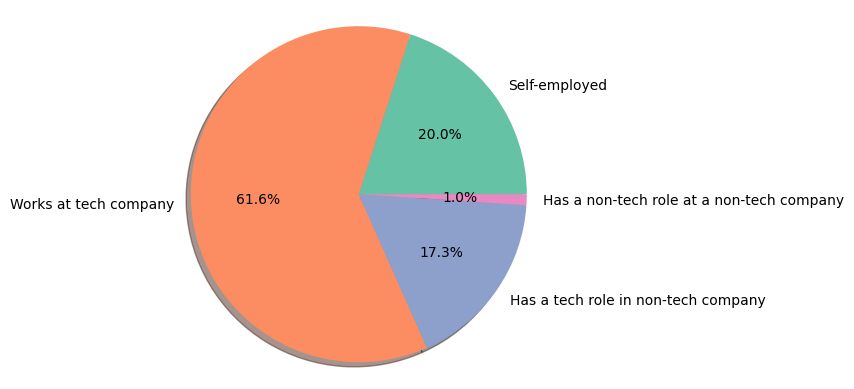

In [ ]:
# pie chart of workers
labels = ['Self-employed', 'Works at tech company', 'Has a tech role in non-tech company', 'Has a non-tech role at a non-tech company']
sizes = [data['Are you self-employed?'].value_counts()[1],
         data['Is your employer primarily a tech company/organization?'].value_counts()[1],
         data['Is your primary role within your company related to tech/IT?'].value_counts()[1],
         data['Is your primary role within your company related to tech/IT?'].value_counts()[0]
        ]
# print(sizes) # adds up to 1433, which is the total number of participants
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

## Distribution of Mental Health Status for All Ages and Genders
- Most of the employees are male, and the typical age of the employees is in the 30s, as we had seen from the tabular summary of the data. 
- It appears that there is slightly more male employees who do not have mental health disorders than male employees who do. 
- There are definitely more female employees who have mental health disorders than those who don't.

In [ ]:
# to make viewing the graphs easier, shorten the column names
data.rename(columns={'What is your age?': 'Age',
                     'What is your gender?': 'Gender',
                     'Do you currently have a mental health disorder?': 'Has MHD'}, inplace=True)

In [ ]:
g = sns.FacetGrid(data, row='Gender', col='Has MHD', size=4)
g.map(plt.hist, 'Age', alpha=0.5, bins=15)
g.add_legend()
plt.show()

## Willingness to Bring Up Health Issues in an Interview: Physical vs. Mental
### Physical Health Issues
- Males tend to be split as to whether or not they are willing to mention their health conditions.
- Females, on the other hand, are a little more unwilling to mention their physical health issues.

### Mental Health Issues
- Compared to physical health issues, very few people of all genders are willing to bring up mental health issues during an interview with a potential employer. This may be due to the stigma or fear that the issue will get in the way of their performance, which may result in a potential employer to not offer them the job.
- It is interesting to note that a large majority of the female survey participants won't mention mental health issues during an interview.

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
fig.suptitle('Responses to "Would you bring up a health issue\nwith a potential employer in an interview?"')
g1 = sns.countplot(x='Would you be willing to bring up a physical health issue with a potential employer in an interview?',
                  hue='Gender', data=data, ax=ax1, order=['Yes', 'No', 'Maybe'])

g2 = sns.countplot(x='Would you bring up a mental health issue with a potential employer in an interview?',
                  hue='Gender', data=data, ax=ax2, order=['Yes', 'No', 'Maybe'])

g1.legend_.remove()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Gender')
g1.set_xlabel('# Responses for\nPhysical Health Issues')
g2.set_xlabel('# Responses for\nMental Health Issues')
g2.set_ylabel('')
plt.show()

## Is Having Mental Health Issues is Harmful to One's Career?
- The majority of the survey participants believe that being identified as a person having a mental health issue would hurt their career.
- This is likely to be the reason why many people would not mention their mental health issue to a potential employer during an interview since they are worried it would affect their chance at getting the job offer.
- There are also very few people who can testify that being identified as someone with a mental health issue does not harm their careers. There are relatively more people who disagree and say that it does in fact harm their career.

In [ ]:
g = sns.countplot(y='Do you feel that being identified as a person with a mental health issue would hurt your career?',
                 hue='Gender', data=data, 
                  order=['Yes, it has', 'Yes, I think it would',
                        'No, it has not', "No, I don't think it would", 'Maybe'])
plt.title('Number of People who Believe Identifying as a Person\nwith a Mental Health Issue is Harmful to Career')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Gender')
plt.ylabel('Number of Responses')
plt.show()

## Potential Negative Consequences for Discussing Health Issues with Employer: Physical vs. Mental
### Physical Health Issues
- The large majority of people are certain that discussing physical health issues with their employers will not result in negative consequences.
- The results here are as expected, especially after seeing the responses to the questions visualized above.

### Mental Health Disorders
- The answers to whether or not discussing mental health disorders with employers will result in negative consequences is more divided.
- Some people believe that discussing mental health disorders will result in a negative consequences.
- However, there are still more people who believe there won't be any negative consequences. This may be because they have already developed a employer-employee relationship and there is a layer of trust when it comes to talking about issues that are on people's minds.
- There are also some people who are unsure of whether or not there would be any negative consequences.

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
fig.suptitle('Responses to "Do you think that discussing a health issue\nwith your employer would have negative consequences?"')
g1 = sns.countplot(x='Do you think that discussing a physical health issue with your employer would have negative consequences?',
                  hue='Gender', data=data, ax=ax1, order=['Yes', 'No', 'Maybe'])

g2 = sns.countplot(x='Do you think that discussing a mental health disorder with your employer would have negative consequences?',
                  hue='Gender', data=data, ax=ax2, order=['Yes', 'No', 'Maybe'])

g1.legend_.remove()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Gender')
g1.set_xlabel('# Responses for\nPhysical Health Issues')
g2.set_xlabel('# Responses for\nMental Health Issues')
g2.set_ylabel('')
plt.show()

In [ ]:
g = sns.countplot(x='Do you think that discussing a mental health disorder with your employer would have negative consequences?',
                 hue='Does your employer provide mental health benefits as part of healthcare coverage?',
                 data=data, 
                 order=['Yes', 'No', 'Maybe'],
                 hue_order=['Yes', 'No', "I don't know", 'Not eligible for coverage / N/A'])

plt.title('Responses to "Do you think that discussing a mental health disorder\nwith your employer would have negative consequences?"')
plt.xlabel('Number of Responses')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,
         title='Mental Health Benefits are Part of Healthcare Coverage')
plt.show()

# Work in Progress

In [ ]:
# this question only applies to self-employed
g = sns.countplot(x='Do you believe your productivity is ever affected by a mental health issue?',
                  data=data, order=['Yes', 'No', 'Unsure', 'Not applicable to me'])
plt.show()

## Company size and willingness to reach out for help

In [ ]:
# data.columns

In [ ]:
# look at people who are not self-employed
data['Does your employer provide mental health benefits as part of healthcare coverage?'].value_counts()

Does your employer provide mental health benefits as part of healthcare coverage?
Yes                                531
I don't know                       319
No                                 213
Not eligible for coverage / N/A     83
Name: count, dtype: int64

In [ ]:
data['Would you feel comfortable discussing a mental health disorder with your coworkers?'].value_counts()

Would you feel comfortable discussing a mental health disorder with your coworkers?
Maybe    479
No       392
Yes      275
Name: count, dtype: int64

In [ ]:
data['Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?'].value_counts()

In [ ]:
# looking at people who are self-employed
data['Do you have medical coverage (private insurance or state-provided) which includes treatment of \xa0mental health issues?'].value_counts()

In [ ]:
data['If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?'].value_counts()